In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Den här uppgiften går ut på att jag ska analysera olika datan i olika tillstånd, vilket sedan ska med egengjort K-means träna och rita ut datan i uppdelade antal kluster.

In [135]:
def any_duplicates(data:str) -> str:
    """
        Prints whether or not there are duplicates.
    """
    import pandas as pd
    
    list_with_false_true = pd.DataFrame.duplicated(data)
    any_true = list_with_false_true.any()
    if any_true:
        print("Number of duplicates: ", list_with_false_true.value_counts()[1] )
    else:
        print("No duplicates found")

## Läser av datan

In [73]:
small_iris_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift5/small_iris.csv")

## Analyserar small_iris datan

In [74]:
small_iris_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [75]:
small_iris_df.shape

(150, 2)

In [76]:
small_iris_df.isna().any()

sepal length (cm)    False
petal length (cm)    False
dtype: bool

In [131]:
any_duplicates(small_iris_df)

Number of duplicates:  27


Text(0, 0.5, 'petal length (cm)')

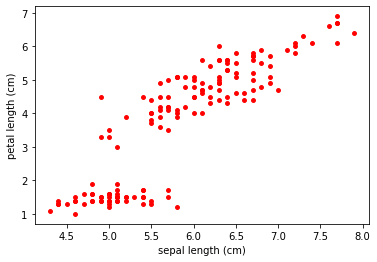

In [78]:
x = small_iris_df["sepal length (cm)"]
y = small_iris_df["petal length (cm)"]

plt.scatter(x, y, s=15, c="red")
plt.xlabel(x.name) 
plt.ylabel(y.name)

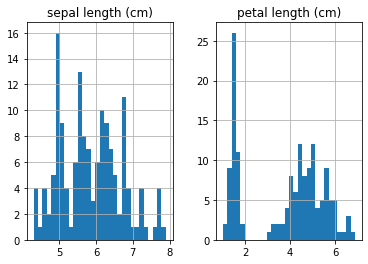

In [168]:
small_iris_df.hist(bins= 30)
plt.show()

### - Innehåller datan konstiga värden? <br>
### - Ska några attribut plockas bort? <br>
### - Behövs datan normaliseras?

Datan har inga saknade värden och konstiga värden, däremot har den dubletter. Datan innehåller blommor så det ser ut som att det finns några blommor som liknar andra. Antalet dubletter är litet så vi behöver inte oroa oss för detta. 

<br> Vad gäller attribut så finns det endast dessa 2 blommor och däremot behöver man inte plocka bort något. 

<br>Värderna i bilden, där jag visar datan med röda prickar, visar att de flesta datapunkter ligger nära varandra vilket betyder att vi inte behöver normalisera. 


## Skapar en egen K-means 

In [80]:
class KMeans(object):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

### Använder elbow metoden, för att få rimlig antal kluster. Här visar det att 3 st ser ut att vara det rätta antalet att dela upp datan

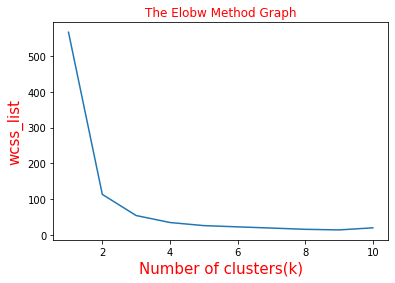

In [106]:
wcss_list=[]
data_to_analyse = small_iris_df

for i in range(1,11):
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(data_to_analyse.values)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11), wcss_list)  
plt.title('The Elobw Method Graph',color='red')  
plt.xlabel('Number of clusters(k)',color='red', fontsize= 15)  
plt.ylabel('wcss_list',color='red', fontsize= 15)  
plt.show()

### Tränar k-means och ritar ut datan med olika k-värden

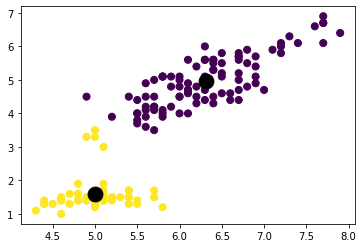

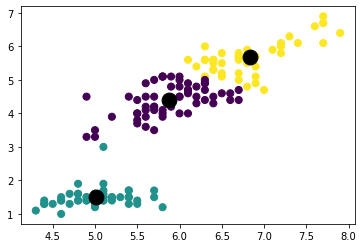

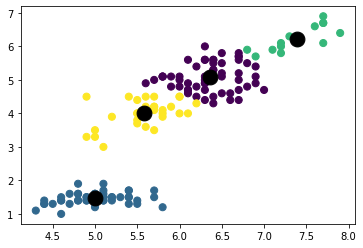

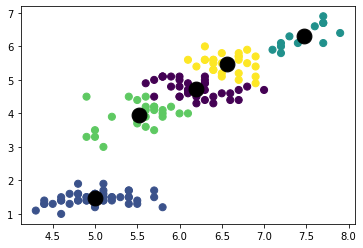

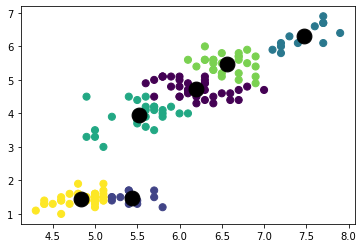

In [124]:
antal_kluster=[2,3,4,5,6]
x = small_iris_df.values

for n in antal_kluster:
    k_means = KMeans(n_clusters=n, max_iter=300, random_state=42)
    k_means.fit(x)
    
    y_kmeans = k_means.predict(small_iris_df)
    
    centroids = np.array(k_means.cluster_centers_)

    plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s=50, cmap='viridis')

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s = 220)
    
    plt.show()


Slutsats: Small_iris datan får delas upp i 3 kluster

# VG uppgiften

In [98]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

## Läser av datan

In [159]:
iris_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift5/iris.csv")
mall_customer_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift5/Mall_Customers.csv")

### Analyserar iris_df

In [125]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [126]:
iris_df.shape

(150, 4)

In [127]:
iris_df.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [132]:
any_duplicates(iris_df)

Number of duplicates:  1


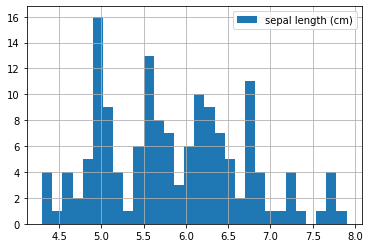

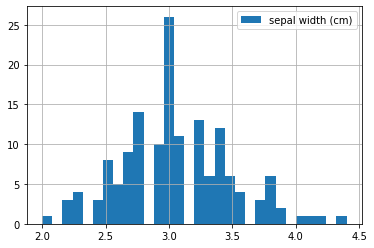

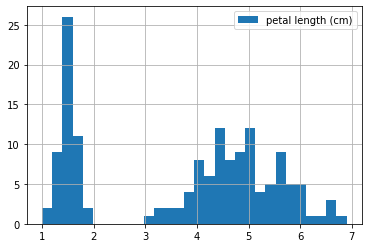

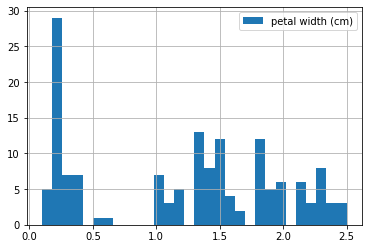

In [144]:
for column in iris_df.columns:
    iris_df[column].hist(bins=30, legend= column)
    plt.show()

### - Innehåller datan konstiga värden? <br>
### - Ska några attribut plockas bort? <br>
### - Behövs datan normaliseras?

Iris_df har inga konstiga eller saknade värden, däremot har den endast 1 dubblet som inte skådar något i undersökningen. <br>
Iris_df innehåller 4 attribut där de alla är olika typer av blommor, vilket konstaterar att vi inte behöver ta bort nån attribut. <br>
Värderna i x-axeln i histogramet ovan visar siffror som ligger mellan 1 och 10 vilket säger oss att det inte behövs någon normalisering i den här datasetet.

<br>

### Elbow metoden, visar lämpliga antal kluster i detta fal är det 3 st

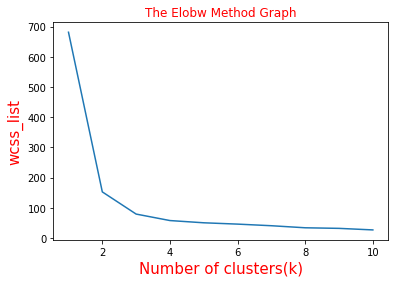

In [136]:
wcss_list=[]
data_to_analyse = iris_df

for i in range(1,11):
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(data_to_analyse.values)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11), wcss_list)  
plt.title('The Elobw Method Graph',color='red')  
plt.xlabel('Number of clusters(k)',color='red', fontsize= 15)  
plt.ylabel('wcss_list',color='red', fontsize= 15)  
plt.show()

### Testar dessa rekommenderade kluster genom att träna och sedan rita ut dem

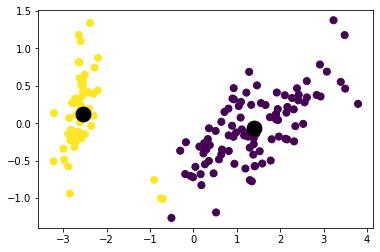

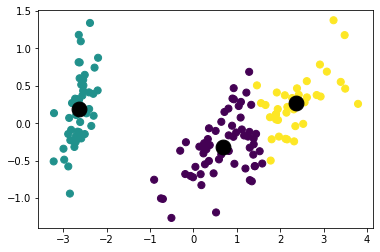

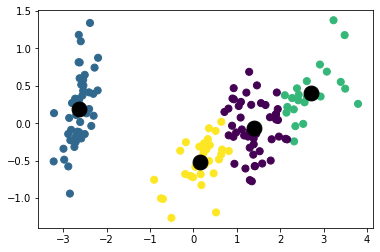

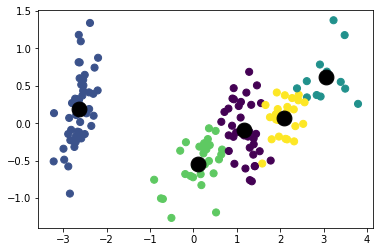

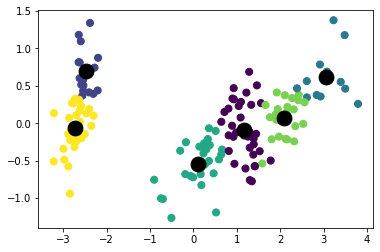

In [145]:
number_of_clusters=[2,3,4,5,6]
train_data = iris_df.values

for n in number_of_clusters:
    ### Training data
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(train_data)
    
    ### transforming training data to 2D to be able to draw them
    trans = pca_transformation(iris_df)
    x = trans.values
    
    y_kmeans = kmeans.predict(x)
    
    centroids = calc_centroids(y_kmeans, x)

    ### draw datapoints
    plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s=50, cmap='viridis')

    ### draw centerpoints
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', s = 220)
    
    plt.show()


I iris_datan är det rimlig att dela upp datan i 3 kluster

### Analyserar mall_customer_df 

In [146]:
mall_customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [147]:
mall_customer_df.shape

(200, 5)

In [149]:
mall_customer_df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [150]:
any_duplicates(mall_customer_df)

No duplicates found


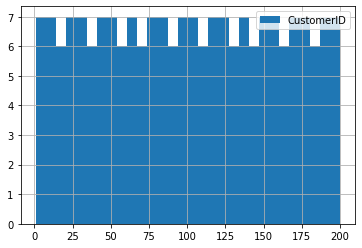

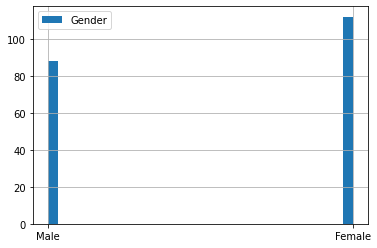

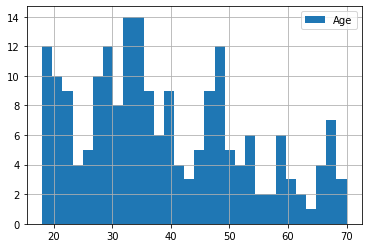

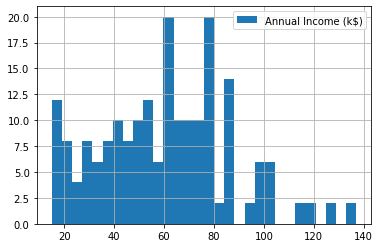

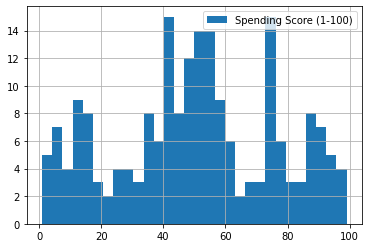

In [151]:
for column in mall_customer_df.columns:
    mall_customer_df[column].hist(bins=30, legend = column)
    plt.show()

### - Innehåller datan konstiga värden? <br>
### - Ska några attribut plockas bort? <br>
### - Behövs datan normaliseras?

Mall_customer_df har inga konstiga eller saknade värden och den har inga dubletter. Dock har den en attribut som ska tas bort vilket är "CustomerID", och för att klustringen ska fungera måste vi ändra värderna i attributen "Gender" till 0 och 1. <br> 
<br>Vad gäller normaliseringen tycker jag att det inte heller behövs i den här datasetet, då värderna i x-axeln i de flesta histogramen ovan har värderna mellan 0 och 130. Däremot går det bra att normalisera om man är orolig att det blir mindre rätt svar då vi har "Gender" attributen med sina 0 och 1 som värde.

<br>

### Redigering av datan, tar bort "CustomerID" och ändrar värderna i "Gender" till 0 och 1.

In [160]:
mall_customer_copy_df = mall_customer_df.drop(columns= "CustomerID")

In [162]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1

mall_customer_copy_df['Gender'] = mall_customer_copy_df['Gender'].apply(gender_to_numeric)

In [163]:
mall_customer_copy_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


### Elbow metoden
Här gav den inte riktig bra värden men vi kommer rita ut och se hur det ser ut

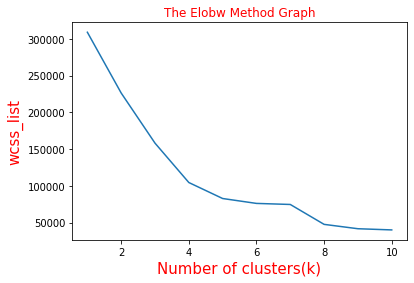

In [166]:
wcss_list=[]
data_to_analyse = mall_customer_copy_df

for i in range(1,11):
    kmeans= KMeans(n_clusters = i)
    kmeans.fit(data_to_analyse.values)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,11), wcss_list)  
plt.title('The Elobw Method Graph',color='red')  
plt.xlabel('Number of clusters(k)',color='red', fontsize= 15)  
plt.ylabel('wcss_list',color='red', fontsize= 15)  
plt.show()

### Ritar ut klusterna

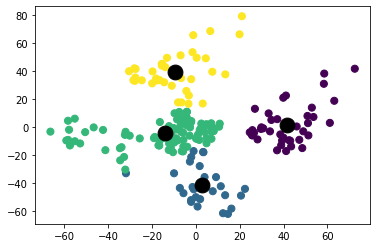

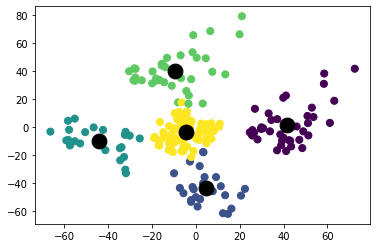

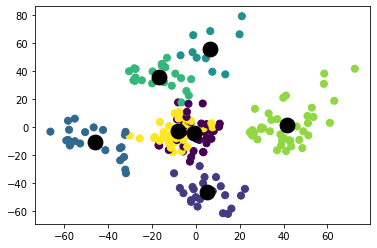

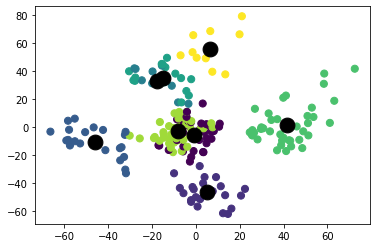

In [167]:
number_of_clusters=[4,5,7,8]
train_data = mall_customer_copy_df.values

for n in number_of_clusters:
    ### Training data
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(train_data)
    
    ### transforming training data to 2D to be able to draw them
    trans = pca_transformation(mall_customer_copy_df)
    x = trans.values
    
    y_kmeans = kmeans.predict(x)
    
    centroids = calc_centroids(y_kmeans, x)

    ### draw datapoints
    plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s=50, cmap='viridis')

    ### draw centerpoints
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', s = 220)
    
    plt.show()


Här är det rimligt med 5 kluster